# Project (final assessment of STK 353)

In [9]:
# imports
import Datasets
from Datasets import Source_Code
#import nltk; nltk.download('all')
import pandas as pd
import re
from nltk.corpus import stopwords
import string # for translating strings to not have any punctuation
import nltk # for lemmatization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# get datasets from source code
Honda_accord_2008_data = Source_Code.send_honda_accord_2008_data()
Honda_accord_2009_data = Source_Code.send_honda_accord_2009_data()
Hyundai_sonata_2009_data = Source_Code.send_hyundai_sonata_2008_data()
Toyota_corolla_2009_data = Source_Code.send_toyota_corolla_2009_data() 

def read_file(filename):
    with open(filename, 'r', encoding='ISO-8859-1') as file:
        text = file.read()
    return text


honda_2008_text = read_file('Datasets/2008_honda_accord')
honda_2009_text = read_file('Datasets/2009_honda_accord')
hyundai_2009_text = read_file('Datasets/2009_hyundai_sonata')
toyota_2009_text = read_file('Datasets/2009_toyota_corolla')

# You can count the comments based on a delimiter or pattern you know each dataset uses to separate comments.
# For this example, let's assume each comment is separated by a newline character.
honda_2008_reviews = honda_2008_text.split('\n')
honda_2009_reviews = honda_2009_text.split('\n')
hyundai_2009_reviews = hyundai_2009_text.split('\n')
toyota_2009_reviews = toyota_2009_text.split('\n')



#type(Honda_accord_2008_data)
#Toyota_corolla_2009_data.info()


Let's discuss the car datasets `2009_honda_accord`, `2009_hyundai_sonata`, and `2009_toyota_corolla`. These datasets contain customer reviews for three different car models from 2009. 

1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset `2008_honda_accord`, which consists of customer reviews for the Honda Accord from the year 2008.

3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into $k$ meaningful groups.

To answer the above questions, please consider the following points:
- a) Obtain the number of comments given in all four reviews and report the results.
- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)
- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.
- d)  The first two questions can be solved using sentiment analysis techniques.
- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.
- f) Determine the optimal value of $k$ from the set $\{2, 3, 4, 5\}$ in Question 3.
- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.
- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

In [6]:
# a) Obtain the number of comments given in all four reviews and report the results.

# Count the number of occurrences using a regex to count the number of comments
accord_08_comment_count = len(Honda_accord_2008_data['doc'].isna())
accord_09_comment_count =  len(Honda_accord_2009_data['doc'].isna())
sonata_09_comment_count =  len(Hyundai_sonata_2009_data['doc'].isna())
corolla_09_comment_count =  len(Toyota_corolla_2009_data['doc'].isna())


#print("This is the length of all the comments: ", len(Toyota_corolla_2009_data))

#print results
print('2008 Honda Accord:', accord_08_comment_count)
print('2009 Honda Accord:', accord_09_comment_count)
print('2009 Hyundai Sonata:', sonata_09_comment_count)
print('2009 Toyota Corolla:', corolla_09_comment_count)

This is the length of all the comments:  226
2008 Honda Accord: 540
2009 Honda Accord: 224
2009 Hyundai Sonata: 262
2009 Toyota Corolla: 226


In [8]:
# Reporting
print("The Results show that the 2008 Honda Accord had the most comments, followed by the 2009 Hyundai Sonata.")
print("The 2009 Honda Accord and the 2009 Toyota Corolla had similar numbers of comments, with the former slightly lower than the latter. ")
print("This suggests that the 2008 Honda Accord was the most popular or controversial car among the four, while the 2009 Honda Accord and the 2009 Toyota Corolla were less so. The 2009 Hyundai Sonata was somewhere in between.")

The Results show that the 2008 Honda Accord had the most comments, followed by the 2009 Hyundai Sonata.
The 2009 Honda Accord and the 2009 Toyota Corolla had similar numbers of comments, with the former slightly lower than the latter. 
This suggests that the 2008 Honda Accord was the most popular or controversial car among the four, while the 2009 Honda Accord and the 2009 Toyota Corolla were less so. The 2009 Hyundai Sonata was somewhere in between.


In [19]:
#- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

print("Here we demonstrate why lemmatization is better thatn stemming in text clearning")

# Sample Text
text = "In this STK353 Project, we are comparing reviews or comments about three different car models from two different years"

# Tokenizing the text
tokens = word_tokenize(text)

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Stemming
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

# Print original tokens, filtered tokens, lemmatized tokens, and stemmed tokens
print("Original Tokens:", tokens)
print("Filtered Tokens (without stopwords):", filtered_tokens)
print("Lemmatized Tokens:", lemmatized_tokens)
print("Stemmed Tokens:", stemmed_tokens)

# Now we create a method to do a simple cleaning and lemmatizing for the car
def clean_text(text):
    # Removing HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Lemmatizing and removing stop words
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(cleaned_words)


# Applying cleaning to the comments
# For demonstration purposes, We will show the process for the 2008 Honda Accord reviews

honda_2008_reviews = [clean_text(review) for review in honda_2008_reviews]
honda_2009_reviews = [clean_text(review) for review in honda_2009_reviews]
hyundai_2009_reviews = [clean_text(review) for review in hyundai_2009_reviews]
toyota_2009_reviews = [clean_text(review) for review in toyota_2009_reviews]
honda_2008_reviews

#Honda_accord_2008_data



Here we demonstrate why lemmatization is better thatn stemming in text clearning
Original Tokens: ['In', 'this', 'STK353', 'Project', ',', 'we', 'are', 'comparing', 'reviews', 'or', 'comments', 'about', 'three', 'different', 'car', 'models', 'from', 'two', 'different', 'years']
Filtered Tokens (without stopwords): ['STK353', 'Project', ',', 'comparing', 'reviews', 'comments', 'three', 'different', 'car', 'models', 'two', 'different', 'years']
Lemmatized Tokens: ['STK353', 'Project', ',', 'comparing', 'review', 'comment', 'three', 'different', 'car', 'model', 'two', 'different', 'year']
Stemmed Tokens: ['stk353', 'project', ',', 'compar', 'review', 'comment', 'three', 'differ', 'car', 'model', 'two', 'differ', 'year']


['_honda_accord',
 '',
 '',
 '',
 'turned k still pleased. nd set tire week ago. purchasing tires, buy speed rating original. % interstate driving returning - mpg. oil change maintenance minder averaging k intervals. issue probably drive k. brake pad front rear date.',
 '',
 '',
 '',
 '',
 '',
 "i've owned three vehicle prior ' accord. first love malibu, second old alero finally isuzu ascender. enjoyed every vehicle but, problem first year. say honda far reliable. quiet, get good gas mileage look clean inside out. love new body style interior simple pleasure except center dash. overall minimal issue car performs like champ. believe top four car price range. think could made wiser choice vehicle single guy family vehicle matter. best vehicle price!",
 '',
 '',
 '',
 '',
 '',
 'purchased honda accord v due reviews. car worst new car ever bought. shop time coil replacement, time new injector pump, time door dash rattle brake miles. hondas me. dealer great car poor choice!',
 '',
 '',
 '',

In [21]:
print('When Lemmatizing the 2008 honda accord car reviews, we see the effect of lemmatization, but we do not see how far better it is than stemming.')
print('However, when we look at the comparison we just did between stemming and lemmatizing, we can observe that: ')
print('lemmatization can preserve the meaning and the part of speech of the original words, while stemming can create non-existent or incorrect words that can confuse the analysis.')
print('For example, the word comparing remained original after lemmatization, but it was change to compar after stemming, which is a non-existent word')
print('This proves why lemmatization is recommended over stemming')

When Lemmatizing the 2008 honda accord car reviews, we see the effect of lemmatization, but we do not see how far better it is than stemming.
However, when we look at the comparison we just did between stemming and lemmatizing, we can observe that: 
lemmatization can preserve the meaning and the part of speech of the original words, while stemming can create non-existent or incorrect words that can confuse the analysis.
For example, the word comparing remained original after lemmatization, but it was change to compar after stemming, which is a non-existent word
This proves why lemmatization is recommended over stemming


In [22]:
#- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.

STOPWORDS = set(stopwords.words('english'))

# Step 1: removing the spaces
def remove_spaces(dataframe):
    df_sans_spaces = dataframe.applymap(lambda x: x.replace('\n', ''))
    print(df_sans_spaces)
    return df_sans_spaces


# Step 2:  removing the punctuation
def rm_punctuation(comment_salad_string):
    comments_word_library = comment_salad_string.split() # splitting the words into individual strings
    translator = str.maketrans('', '', string.punctuation) # creating a table transaltion table to remove the punctuation
    sans_punctuation_words = [word.translate(translator) for word in comments_word_library] # Removes the punctuation
    print("rm punctuation:", sans_punctuation_words)
    return sans_punctuation_words


# Step 3: Removing numbers and words
def remove_numbers_n_words(word_lib):
    # Defining a regular expression pattern to match single digits and 'doc' (case-insensitive)
    pattern = r'\d\b|\bdoc\b'
    
    # Using list comprehension to filter out undesired elements
    filtered_words = [word for word in word_lib if not re.search(pattern, word, re.I)]

    # Joining the filtered words back into a single string or keep as a list
    filtered_text = ' '.join(filtered_words)    
    
    return filtered_text.split()


# Step 4: removing the stopwords
def rm_stopwords(comment_salad_string_list):
    # Removing stopwords from the list of words
    filtered_words = [word for word in comment_salad_string_list if word.lower() not in STOPWORDS]
    
    # Converting each word to lowercase using list comprehension
    lowercase_words = [word.lower() for word in filtered_words]  
    
    return lowercase_words


# Step 5: get remaining clean words
def get_cleaned_words(dataframe):
    # sending dataframe to remove the empty spaces in the series rows
    sans_spaces_df = remove_spaces(dataframe)
    
    #print("omega strng list:", str(sans_spaces_df['doc']))
    
    # getting comments column from dataframe and make it a big string
    big_string = ''
    for _, row in sans_spaces_df.iterrows():
        big_string += ' '.join(row) + ' '
    
    # removing the punctuation from the string
    sans_punctuation_comment_string_list = rm_punctuation(big_string)
    
    # removing the numbers and words
    sans_numbers_words = remove_numbers_n_words(sans_punctuation_comment_string_list)
    
    # removing the stopwords
    sans_stopwords_words = rm_stopwords(sans_numbers_words)
    
    # getting cleaned string of words
    cleaned_comments_string_list = sans_stopwords_words
    
    return cleaned_comments_string_list # cleaned words
    

# Step 6: Resulting output
clean_words = get_cleaned_words(Honda_accord_2008_data)
clean_words


C:\Users\Nkateko\AppData\Local\Temp\ipykernel_13424\3900471611.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sans_spaces = dataframe.applymap(lambda x: x.replace('\n', ''))


                                                   doc
0    Just turned 90K and still pleased. 2nd set of ...
1    I've owned three vehicles prior to my 08' Acco...
2    Purchased a Honda Accord V6 due to the reviews...
3    I leased a 2008 Accord in April 2008 - at 7,00...
4    Overall a pretty nice car but has some model c...
..                                                 ...
535  Not as quiet as a Lexus, but quiet enough. Not...
536  I had been in GM truck leases for over 7 years...
537  This is my 3rd accord that I've owned in the p...
538  Love, love, love my 190hp. Was uncertain about...
539  I have been driving my 2008 Accord V6 for a ye...

[540 rows x 1 columns]
rm punctuation: ['Just', 'turned', '90K', 'and', 'still', 'pleased', '2nd', 'set', 'of', 'tires', '3', 'weeks', 'ago', 'If', 'purchasing', 'tires', 'buy', 'same', 'speed', 'rating', 'as', 'original', '90', 'interstate', 'driving', 'is', 'returning', '3234', 'MPG', 'Oil', 'change', 'by', 'Maintenance', 'Minder', 'av

['turned',
 '90k',
 'still',
 'pleased',
 '2nd',
 'set',
 'tires',
 'weeks',
 'ago',
 'purchasing',
 'tires',
 'buy',
 'speed',
 'rating',
 'original',
 'interstate',
 'driving',
 'returning',
 'mpg',
 'oil',
 'change',
 'maintenance',
 'minder',
 'averaging',
 '10k',
 'intervals',
 'issues',
 'probably',
 'drive',
 '200k',
 'brake',
 'pads',
 'front',
 'rear',
 'date',
 'ive',
 'owned',
 'three',
 'vehicles',
 'prior',
 'accord',
 'first',
 'love',
 'malibu',
 'second',
 'olds',
 'alero',
 'finally',
 'isuzu',
 'ascender',
 'enjoyed',
 'every',
 'vehicle',
 'problems',
 'first',
 'year',
 'say',
 'honda',
 'far',
 'reliable',
 'quiet',
 'get',
 'good',
 'gas',
 'mileage',
 'looks',
 'clean',
 'inside',
 'love',
 'new',
 'body',
 'style',
 'interior',
 'simple',
 'pleasure',
 'except',
 'center',
 'dash',
 'overall',
 'minimal',
 'issues',
 'car',
 'performs',
 'like',
 'champ',
 'believe',
 'top',
 'four',
 'cars',
 'price',
 'range',
 'dont',
 'think',
 'could',
 'made',
 'wiser',
 '

In [24]:
#- d)  The first two questions can be solved using sentiment analysis techniques.

# Solving the first question using TextBlob
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to count comments based on sentiment
def count_comments_by_sentiment(reviews):
    positive_comments = 0
    neutral_comments = 0
    negative_comments = 0

    for comment in reviews:
        sentiment_polarity = get_sentiment_polarity(comment)
        
        if sentiment_polarity > 0:
            positive_comments += 1
        elif sentiment_polarity < 0:
            negative_comments += 1
        else:
            neutral_comments += 1

    return positive_comments, neutral_comments, negative_comments

# Count comments based on sentiment for each dataset
accord_08_positive, accord_08_neutral, accord_08_negative = count_comments_by_sentiment(honda_2008_reviews)
accord_09_positive, accord_09_neutral, accord_09_negative = count_comments_by_sentiment(honda_2009_reviews)
sonata_09_positive, sonata_09_neutral, sonata_09_negative = count_comments_by_sentiment(hyundai_2009_reviews)
corolla_09_positive, corolla_09_neutral, corolla_09_negative = count_comments_by_sentiment(toyota_2009_reviews)

# Print results
print('2008 Honda Accord (Positive, Neutral, Negative):', accord_08_positive, accord_08_neutral, accord_08_negative)
print('2009 Honda Accord (Positive, Neutral, Negative):', accord_09_positive, accord_09_neutral, accord_09_negative)
print('2009 Hyundai Sonata (Positive, Neutral, Negative):', sonata_09_positive, sonata_09_neutral, sonata_09_negative)
print('2009 Toyota Corolla (Positive, Neutral, Negative):', corolla_09_positive, corolla_09_neutral, corolla_09_negative)


2008 Honda Accord (Positive, Neutral, Negative): 466 2711 78
2009 Honda Accord (Positive, Neutral, Negative): 325 974 47
2009 Hyundai Sonata (Positive, Neutral, Negative): 436 1114 24
2009 Toyota Corolla (Positive, Neutral, Negative): 349 969 40


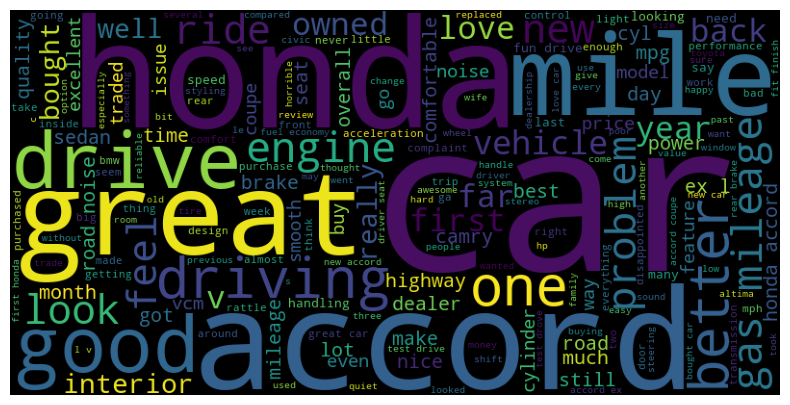

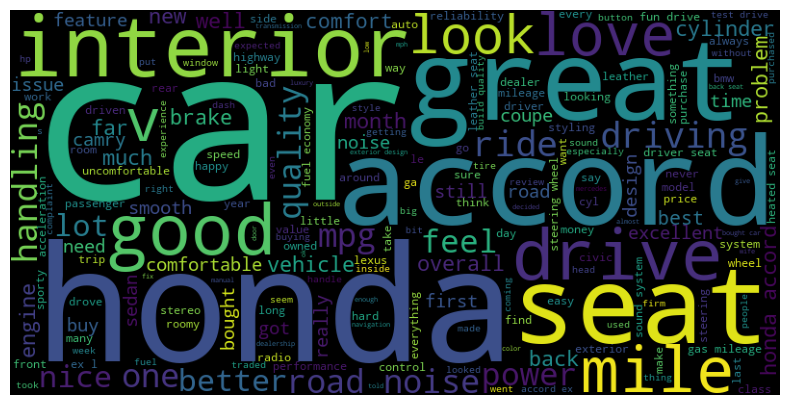

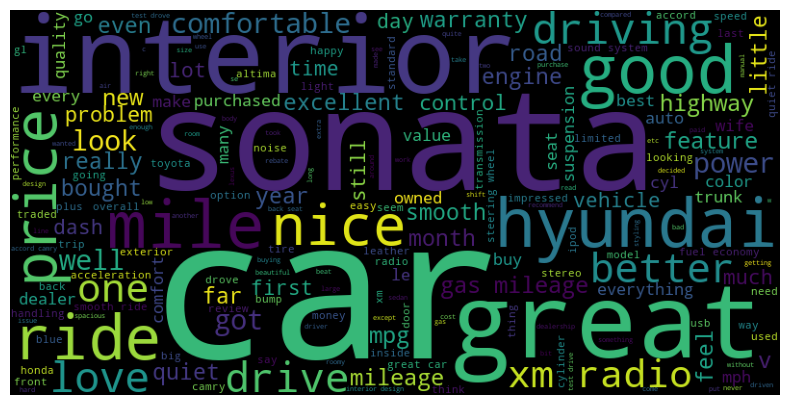

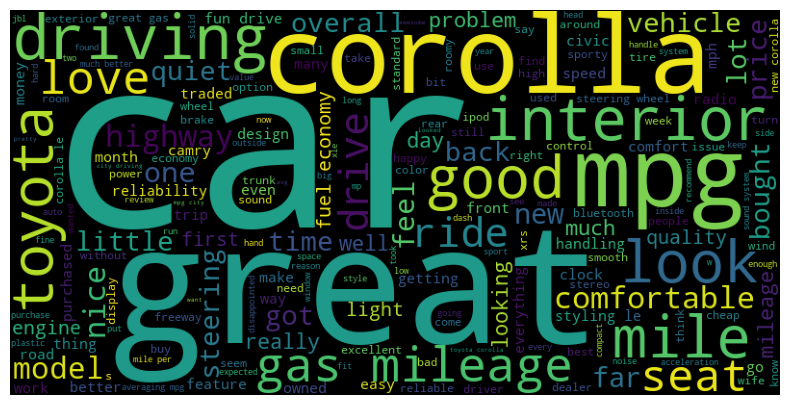

In [70]:
#- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.

#imports

from wordcloud import WordCloud
import matplotlib.pyplot as plt


#code
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Generate wordclouds for each dataset
# As an example, here's how to do it for the 2008 Honda Accord
generate_wordcloud(' '.join(honda_2008_reviews))
generate_wordcloud(' '.join(honda_2009_reviews))
generate_wordcloud(' '.join(hyundai_2009_reviews))
generate_wordcloud(' '.join(toyota_2009_reviews))

c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

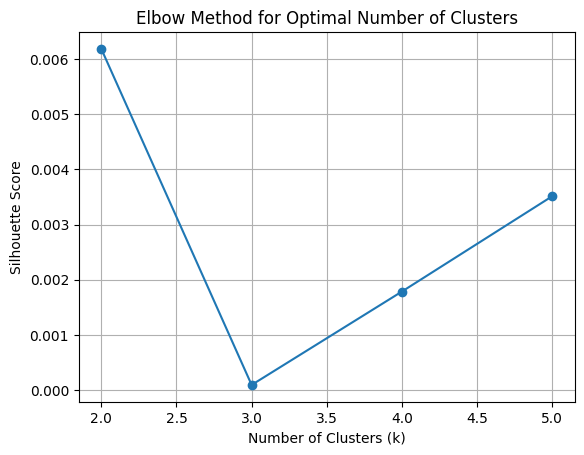

The optimal number of clusters is: 3


In [104]:
#- f) Determine the optimal value of k from the set {2, 3, 4, 5} in Question 3.

# Version 1

#imports 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# S2: Feature extraction
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(Honda_accord_2008_data['doc'])
#tfidf_matrix = tfidf_vectorizer.fit_transform(honda_2008_reviews)

# S3: Choossing the evaluation metrics


# S4: 

# Initialize an empty list to store the WSS values and set range
silhouette_values = []
k_values = range(2,6) # trying k from 2 to 10 clusters


# Fit K-means for each value of k and calculate WSS; 
for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)

    # Step 5: Evaluate Clusters
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_values.append(silhouette_avg)
    

# Plot the WSS values vs. the number of clusters (k)
plt.plot(k_values, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

#obtain optimal cluster size from plot
optimal_clusters_size = 3

# optimal number of clusters
print("The optimal number of clusters is:", optimal_clusters_size)

In [ ]:
# Version 2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Let's assume `cleaned_reviews` is a list of your cleaned review texts.
# cleaned_reviews = [clean_review(review) for review in reviews]

# Convert the cleaned reviews to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(honda_2008_reviews)

print(honda_2008_reviews)

# Calculate WCSS for different values of k.
wcss = []
K = range(2, 6)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(tfidf_matrix)
    wcss.append(k_means.inertia_)

# Plot the results to observe 'The Elbow'
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
#- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.

In [ ]:
#- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

# TESTING TESTING......

c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: x and y must have same first dimension, but have shapes (9,) and (2,)

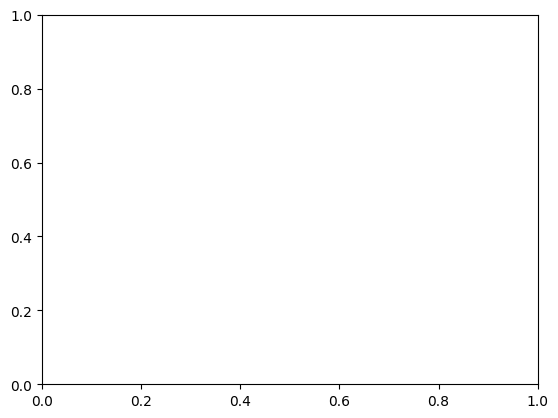

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample text data
text_data = ["Sample text 1", "Another example of text", "Text data for clustering", "More text data", "Data science is fun"]

# Step 1: Text Preprocessing
# Preprocess the text data as needed (e.g., lowercasing, removing stopwords, etc.)

# Step 2: Feature Extraction
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Step 3: Choosing Evaluation Metrics
# You can use Silhouette Score as an example
scores = []

# Step 4: Implement Clustering Algorithms
for k in range(2, 4):  # Try k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)

    # Step 5: Evaluate Clusters
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    scores.append(silhouette_avg)

# Step 6: Elbow Method
# Plot the scores to find the optimal k
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette Score')
plt.show()


In [65]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Column1': ['Hello', 'This', 'Is'],
    'Column2': ['World', 'a', 'Sample'],
    'Column3': ['!', 'DataFrame', 'String']
}
df = pd.DataFrame(data)

# Append rows to a single string using a loop
result = ''
for _, row in df.iterrows():
    result += ' '.join(row) + ' '

# Alternatively, you can use list comprehension
# result = ' '.join([' '.join(row) for _, row in df.iterrows()])

# Print the resulting string
print(result)


Hello World ! This a DataFrame Is Sample String 
